In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('../../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [70]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No null values present

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


# Visualizing Data

### Visualizing categorical features relation with "expenses"

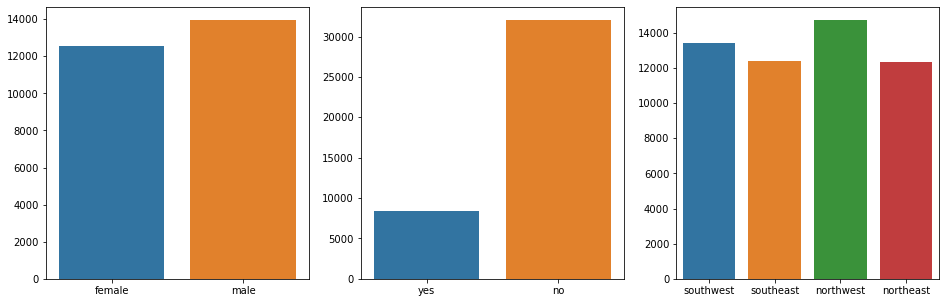

In [98]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sex_df = df.groupby('sex')
sns.barplot(x=df['sex'].unique(), y=(sex_df['expenses'].sum() / sex_df['sex'].count()))
plt.subplot(1,3,2)
smoker_df = df.groupby('smoker')
sns.barplot(x=df['smoker'].unique(), y=(smoker_df['expenses'].sum() / smoker_df['smoker'].count()))
plt.subplot(1,3,3)
region_df = df.groupby('region')
sns.barplot(x=df['region'].unique(), y=(region_df['expenses'].sum() / region_df['region'].count()))

plt.show()

__Observation:__ 
1. Male average expeses are greater than female average expenses
2. Smokers average expenses are greater than non smokers average expenses
3. Northwest average expenses are higher than other regions average expenses

All categorical features are correlated with expenses

### Visualizing numerical features relation with "expenses"

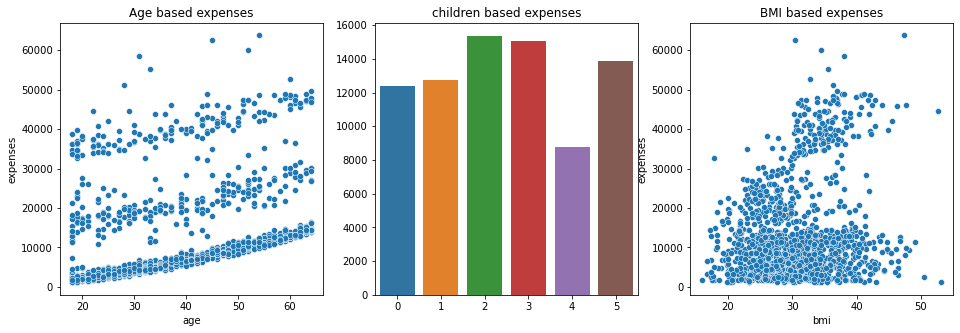

In [110]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.scatterplot(x=df['age'], y=df['expenses'])
plt.title('Age based expenses')

plt.subplot(1,3,2)
children_df = df.groupby('children')
sns.barplot(x=df['children'].unique(), y=(children_df['expenses'].sum() / children_df['children'].count()))
plt.title('children based expenses')

plt.subplot(1,3,3)
sns.scatterplot(x=df['bmi'], y=df['expenses'])
plt.title('BMI based expenses')
plt.show()

__Observation:__
1. Age and BMI is showing linear positive relation with expenses
2. Children is showing vary low positive relation with expenses

### Checking for outliers in BMI and Age feature

/home/harish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/harish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/harish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


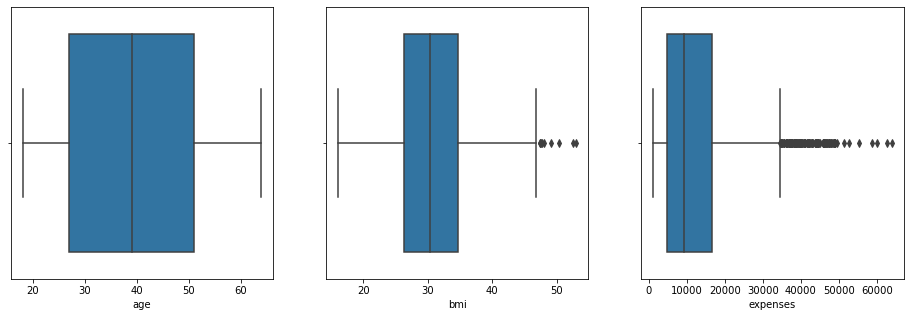

In [113]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.boxplot(df['age'])

plt.subplot(1,3,2)
sns.boxplot(df['bmi'])

plt.subplot(1,3,3)
sns.boxplot(df['expenses'])

plt.show()

children is a categorical column which has values from 1 to 5 bmi and age features has skewness

### Performing Log Transformation in bmi & expenses to remove the outliers

/home/harish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/harish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


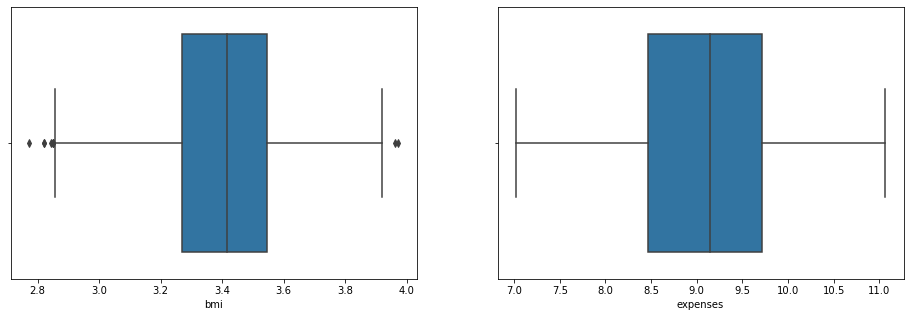

In [139]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(np.log(df['bmi']))

plt.subplot(1,2,2)
sns.boxplot(np.log(df['expenses']))

plt.show()

__Log transformation working perfectly for expenses but with bmi it still has some outliers__

### Performing boxcox, square root, cube root transformation in bmi

/home/harish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/harish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/harish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


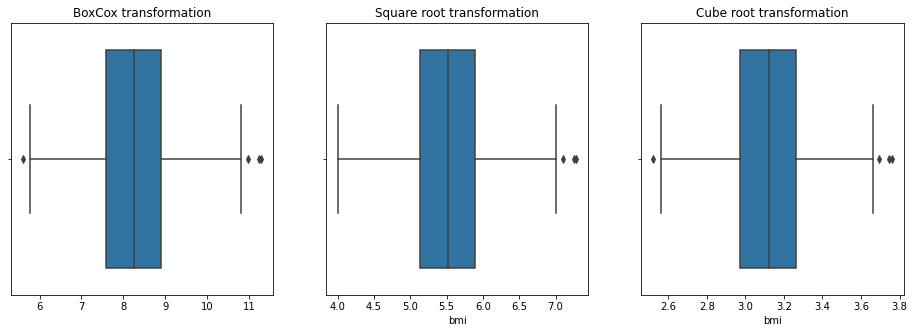

In [129]:
from scipy import stats

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.boxplot(stats.boxcox(df['bmi'])[0])
plt.title('BoxCox transformation')

plt.subplot(1,3,2)
sns.boxplot(np.sqrt(df['bmi']))
plt.title('Square root transformation')

plt.subplot(1,3,3)
sns.boxplot(np.cbrt(df['bmi']))
plt.title('Cube root transformation')

plt.show()

__With square root transformation almost all the outliers are sattled__

## Applying transformation changes

In [141]:
df['expenses'] = np.log(df['expenses'])
df['bmi'] = np.sqrt(df['bmi'])

## To remove remaining outliers from bmi performing winsorizing 

In [144]:
from scipy.stats.mstats import winsorize

/home/harish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


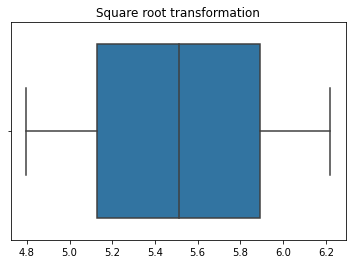

In [146]:
sns.boxplot(winsorize(df['bmi'], (0.1, 0.1)))
plt.title('Square root transformation')

plt.show()

In [153]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,5.282045,0,yes,southwest,9.734176
1,18,male,5.813777,1,no,southeast,7.453301
2,28,male,5.744563,3,no,southeast,8.400538
3,33,male,4.764452,0,no,northwest,9.998092
4,32,male,5.375872,0,no,northwest,8.260198


In [159]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
pd.DataFrame(ohe.fit_transform(df[['sex']]))

,0
0,
1,"(0, 0)\t1.0"
2,"(0, 0)\t1.0"
3,"(0, 0)\t1.0"
4,"(0, 0)\t1.0"
...,...
1333,"(0, 0)\t1.0"
1334,
1335,
1336,


In [169]:
df = pd.read_csv('../../data/insurance.csv')
df.head()



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [183]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['sex', 'smoker', 'region'], return_df=True )
encoder.fit_transform(df)

/home/harish/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,age,sex_1,sex_2,bmi,children,smoker_1,smoker_2,region_1,region_2,region_3,region_4,expenses
0,19,1,0,27.9,0,1,0,1,0,0,0,16884.92
1,18,0,1,33.8,1,0,1,0,1,0,0,1725.55
2,28,0,1,33.0,3,0,1,0,1,0,0,4449.46
3,33,0,1,22.7,0,0,1,0,0,1,0,21984.47
4,32,0,1,28.9,0,0,1,0,0,1,0,3866.86
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,1,31.0,3,0,1,0,0,1,0,10600.55
1334,18,1,0,31.9,0,0,1,0,0,0,1,2205.98
1335,18,1,0,36.9,0,0,1,0,1,0,0,1629.83
1336,21,1,0,25.8,0,0,1,1,0,0,0,2007.95


In [179]:
df.sample(5, random_state=21)

,age,sex,bmi,children,smoker,region,expenses
831,36,female,25.8,0,no,northwest,5266.37
1287,36,female,25.9,1,no,southwest,5472.45
1259,52,female,23.2,0,no,northeast,10197.77
827,36,male,28.0,1,yes,northeast,20773.63
933,45,female,35.3,0,no,southwest,7348.14


In [180]:
encoder.transform(df.sample(5, random_state=21))

,age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2,expenses
831,36,0.0,1.0,25.8,0,1.0,0.0,0.0,1.0,1.0,5266.37
1287,36,0.0,1.0,25.9,1,1.0,0.0,0.0,0.0,1.0,5472.45
1259,52,0.0,1.0,23.2,0,1.0,0.0,1.0,0.0,0.0,10197.77
827,36,1.0,0.0,28.0,1,0.0,1.0,1.0,0.0,0.0,20773.63
933,45,0.0,1.0,35.3,0,1.0,0.0,0.0,0.0,1.0,7348.14


In [13]:
one_hot_df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
one_hot_df

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [14]:
X = one_hot_df.drop('expenses', axis=1)
Y = one_hot_df['expenses']

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scale_df = scaler.fit_transform(X, Y)
scale_df

array([[-1.43876426, -0.4536457 , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.51418574, -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38295436,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.02270734, -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79812808, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.25679863, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
trainX, testX, trainY, testY = train_test_split(scale_df, Y, test_size=0.25, random_state=21)
trainX.shape, trainY.shape, testX.shape, testY.shape

((1003, 8), (1003,), (335, 8), (335,))

In [25]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(trainX, trainY)
predict = lr_model.predict(testX)
print('Linear Regression Model Training Score',lr_model.score(trainX, trainY))
print('Linear Regression Model Testing Score',lr_model.score(testX, testY))

Linear Regression Model Training Score 0.76141090190317
Linear Regression Model Testing Score 0.713472428962064
